In [2]:
INPUT_DIR='../data/processed/'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv(INPUT_DIR+'final_data.csv', index_col=0)

In [4]:
df.columns

Index(['name', 'Brand', 'Best Sellers Rank', 'weight', 'Laptop type',
       'Laptop purpose', 'Screen Size', 'Hard Drive Size', 'Hard Drive Type',
       'Memory Speed', 'Memory Size', 'Memory Type', 'Processor',
       'Processor rank', 'Graphics Coprocessor', 'Graphics Coprocessor perf',
       'Optical Drive Type', 'Operating System', 'Number of USB 3.0 Ports',
       'Number of USB 2.0 Ports', 'Date First Available', 'Customer Reviews',
       'old_price', 'price'],
      dtype='object')

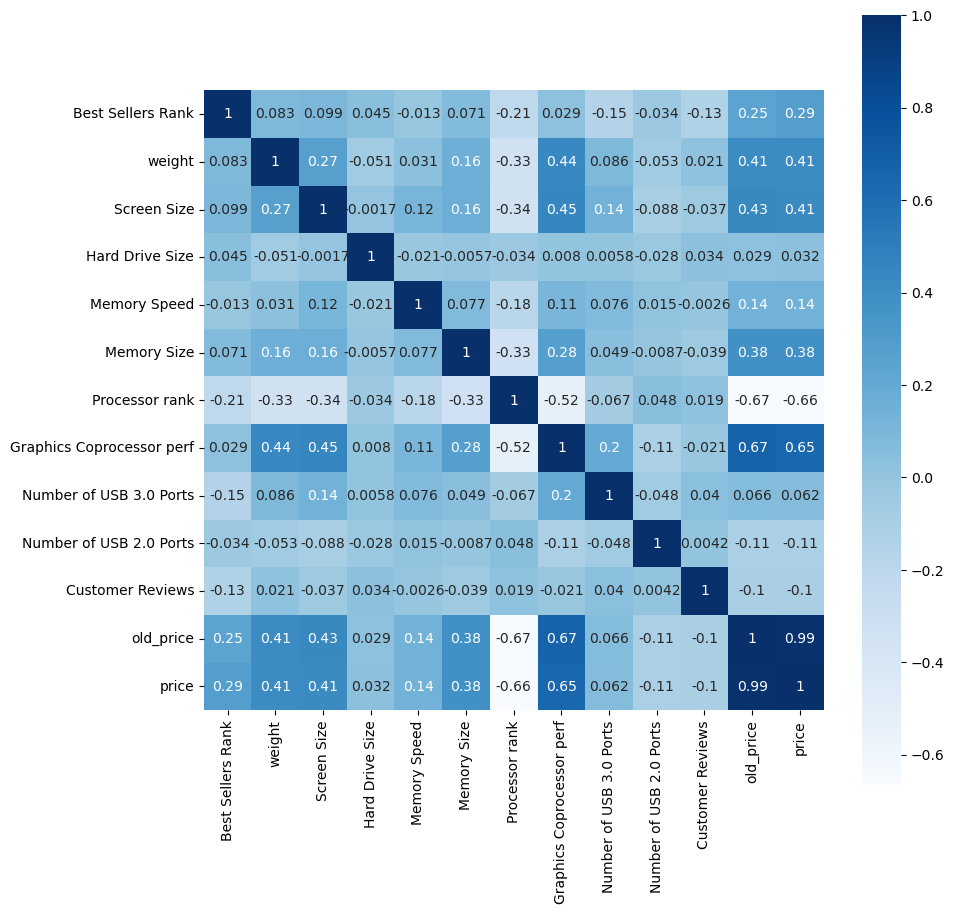

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# tinh su phu thuoc cua tung thuoc tinh
correlation = df.corr(method='pearson')
fig = plt.figure(figsize=(10,10)) 
#figsize: figure size by inches
#subplot: draw mutiple plots in one figure
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues');

# EDA

In [6]:
df=df.reset_index()

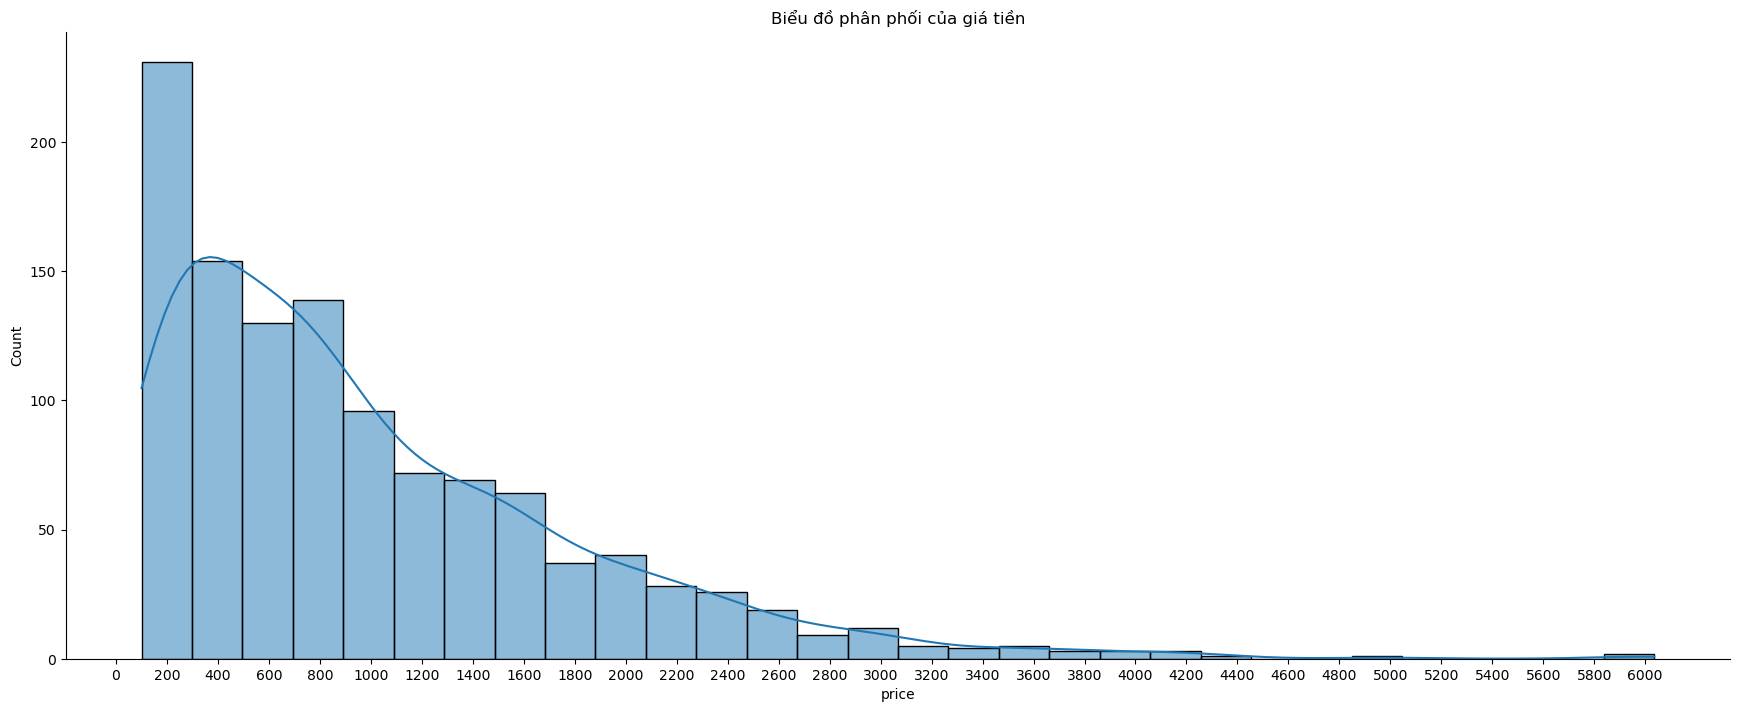

In [7]:
#sns.set(rc={"figure.figsize":(30, 30)}) 
sns.displot(data=df, x="price", kde=True, kind='hist', height=7, aspect=2.5)
plt.xticks(np.arange(0, df['price'].max(), 200));
plt.title('Biểu đồ phân phối của giá tiền');

Đầu tiên, ta có cái nhìn tổng quan về biến target price, ta thấy hiện này laptop trên thị trường tập trung
nhiều nhất ở phân khúc từ 200 đến dưới 1000 đô. Cá biệt, ta thấy có một số laptop có giá rất cao trên 5000 đô, thì đây hầu
như là các máy chơi gaming, hoặc dành cho creator chuyên nghiệp

Text(0.5, 1.0, 'Biểu đồ phân tán giữa giá tiền và tốp bán chạy')

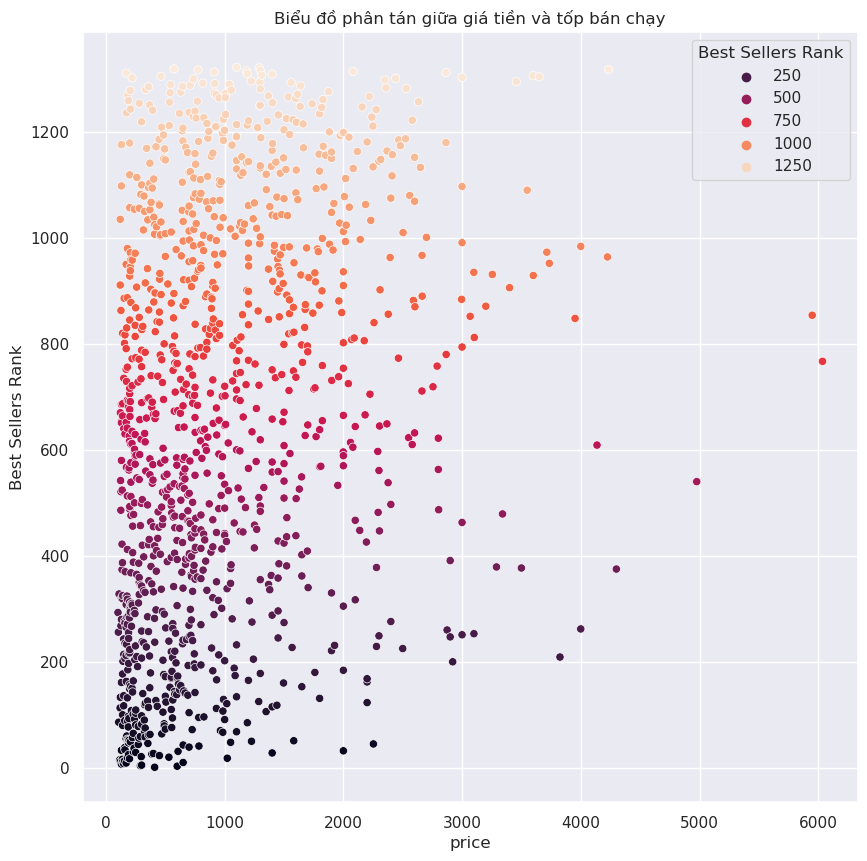

In [8]:
sns.set(rc={"figure.figsize":(10, 10)}) 
sns.scatterplot(data=df, x="price", y="Best Sellers Rank", hue="Best Sellers Rank", palette='rocket')
plt.title('Biểu đồ phân tán giữa giá tiền và tốp bán chạy')

Ngoài việc các mẫu laptop giá rẻ chiếm đa số trên thị trường. Dựa vào biểu đồ, trong khoảng giá dưới 1000 đô, cũng tập trung nhiều sản phẩm nằm trong top mua sắm của người dùng nhất: đặc biệt là top đầu 200, hoàn toàn trội hơn so với các phân khúc cao hơn. Tuy nhiên ở đây, vẫn có nhiều nhất sản phẩm rẻ nhất cộng nằm chót về lượt mua sắm. Về sau, khi giá càng cao, các sản phẩm có xu hướng cân bằng tức không nằm chót bảng cũng không nằm đầu bảng tốp mua sắm


Text(0.5, 1.0, 'Biểu đồ hộp thể hiện tên thương hiệu và giá cả laptop')

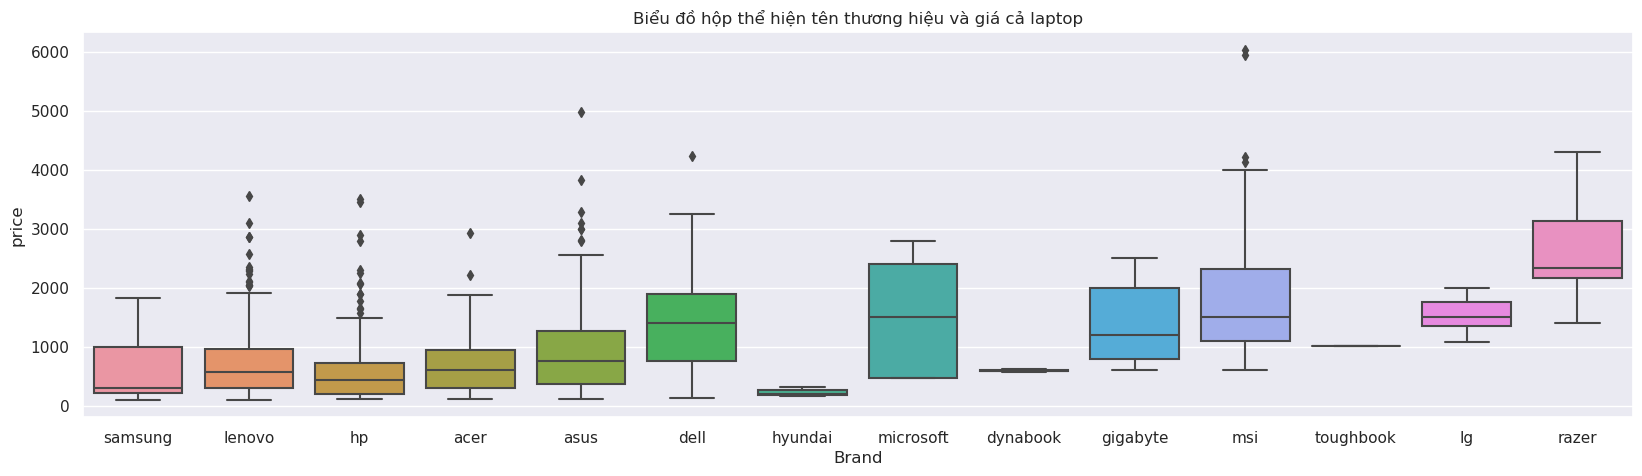

In [9]:
fig, ax=plt.subplots(figsize=(20, 5))
sns.boxplot(x=df["Brand"], y=df['price'])
plt.title('Biểu đồ hộp thể hiện tên thương hiệu và giá cả laptop')

Đây là biểu đồ hộp thể hiện tên thương hiệu và giá cả laptop. Ta thấy rằng có một số box gần như overlap với nhau khi so sánh về giá, chẳng hạn samsung, lenovo, hp, acer, asus, còn một số box thì lại ở phân khúc giá cao hơn hẵn, như razer.

In [10]:
import plotly.express as px
import plotly.graph_objects as go

In [11]:
purpose_per_brand=df.groupby(by=['Brand', 'Laptop purpose'])['weight'].count().reset_index()
purpose_per_brand=purpose_per_brand.rename(columns={'weight': 'Count'})
purpose_per_brand['Laptop brand']='Laptop brand'
purpose_per_brand.head()

,Brand,Laptop purpose,Count,Laptop brand
0,acer,gaming,12,Laptop brand
1,acer,general,130,Laptop brand
2,asus,gaming,25,Laptop brand
3,asus,general,181,Laptop brand
4,dell,gaming,2,Laptop brand


In [12]:
def show_sunburst(a, path_col, tittle=""):
    for col in a.columns:
        if(col not in path_col):
            free_col=col
            break
    grouped=a.groupby(by=path_col)[free_col].count().reset_index()
    grouped['#'+path_col[0]]='#'+path_col[0]
    path_col.insert(0, '#'+path_col[0])
    fig = px.sunburst(grouped,
                    path=path_col,
                    values=free_col,
                    width=750, height=750,
                    title=tittle
                    )
    fig.show()

show_sunburst(df, ["Brand", "Laptop purpose"], "Loại laptop của các thương hiệu")


Để làm rõ hơn, ta phân tích về chênh lệch các kiểu laptop mà các hãng sãn xuất, có hai loại là laptop gaming và laptop đại trà. Dễ thấy với samsung, lenovo, hp, acer hay asus tập trung sản xuất máy đại trà và trội hơn nhiều so với gaming. Ngược lại với razer, hãng này lại thiên về sản xuất máy gaming

[Text(0.5, 1.0, 'Biểu đồ hộp thể hiện tên thương hiệu và giá cả laptop')]

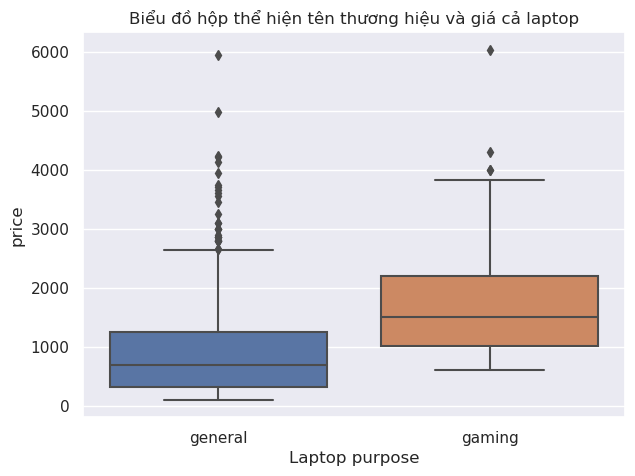

In [13]:
fig, ax=plt.subplots(figsize=(7, 5))
sns.boxplot(x=df["Laptop purpose"], y=df['price']).set(title='Biểu đồ hộp thể hiện tên thương hiệu và giá cả laptop')


Đồng thời đó, phân tích quan hệ giữa kiểu laptop và giá, thì giá máy gaming hầu như là cao so với đại trà, một số máy genneral cao, nhưng không chiếm đa số bằng. 
Từ đó ta giải thích được vì sao giá một số thương hiệu lại cao hơn một số thương hiệu khác. 
Điều này còn tuỳ vào định hướng của mỗi thương hiệu: có những thương hiệu muốn cân bằng cả hai loại, 
nhưng cũng có những thương hiệu muốn tập trung vào một dòng máy, như nhắc tới razer là nhắc tới máy gaming

In [14]:
df[df['Best Sellers Rank']==3]['name']

455    lenovo ideapaeMMCming 3 - 2022 - everyday gami...
Name: name, dtype: object

In [15]:
df.groupby(by=['Laptop purpose', 'Brand'])['Best Sellers Rank'].mean().reset_index()

,Laptop purpose,Brand,Best Sellers Rank
0,gaming,acer,527.916667
1,gaming,asus,351.080000
2,gaming,dell,683.000000
3,gaming,gigabyte,803.666667
4,gaming,hp,614.857143
5,gaming,lenovo,519.133333
6,gaming,msi,617.528302
7,gaming,razer,540.866667
8,gaming,samsung,358.000000
9,general,acer,610.038462


In [16]:
temp = df.groupby(by=['Laptop purpose', 'Brand'])['Best Sellers Rank'].min().reset_index()

fig = px.scatter(temp, y="Laptop purpose", x="Best Sellers Rank", color="Brand", symbol="Brand",
title="Tốp bán hàng cao nhất của các thương hiệu ở mỗi loại laptop")
fig.update_traces(marker_size=10)
fig.show()

Ta thấy với loại máy đại trà, thương hiệu đang được mua nhiều nhất là lenovo, acer, samsung, asus, hp

Còn với máy gaming, thương hiệu được mua nhiều nhất là lenovo, asus, acer, msi, razer

Một trong những yếu tố quyết định mục đích sử dụng laptop như vừa rồi, là nằm ở CPU trong laptop. Cùng tìm hiểu, với laptop mục đích đại trà và laptop gaming, các CPU cung ứng của nó tới từ những thương hiệu nào

In [21]:
df['CPU brand']=df['Processor'].apply(lambda x: re.findall(r'^(\w*)\s', x)[0] if pd.notna(x) else x)

[Text(0.5, 1.0, 'Thương hiệu CPU trong từng loại laptop')]

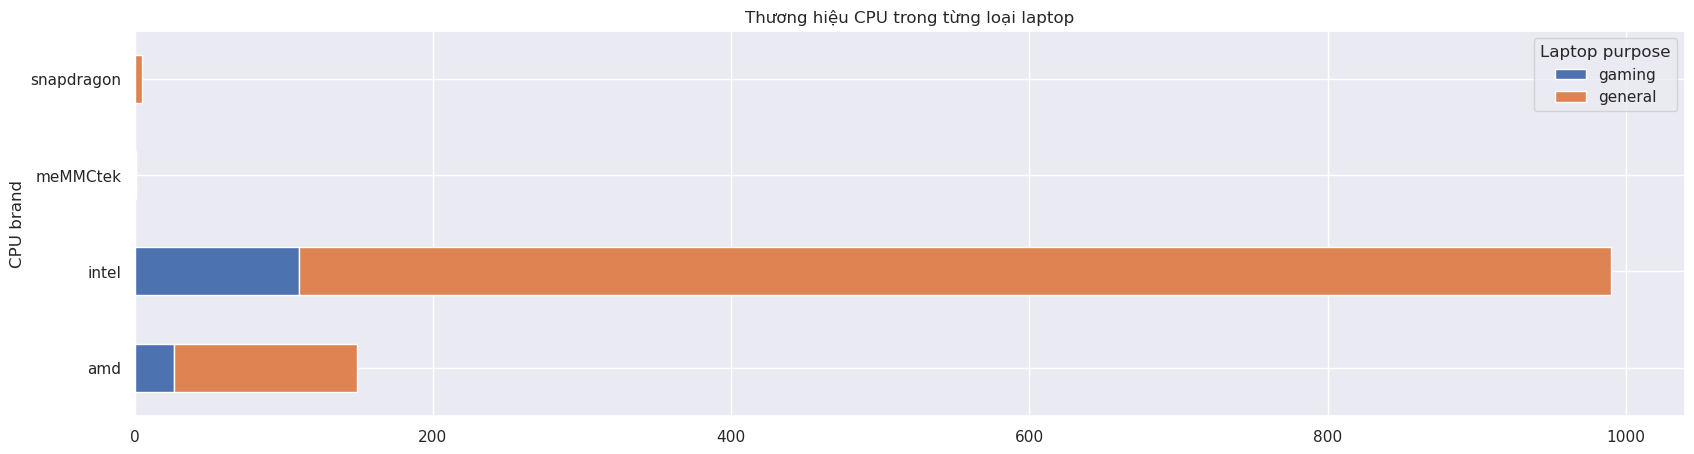

In [22]:
l=df.groupby(by=['CPU brand', 'Laptop purpose'])['Brand'].count().unstack(-1).fillna(0)
l.plot.barh(stacked=True, figsize=(20, 5)).set(title='Thương hiệu CPU trong từng loại laptop')

Ta thấy hiện nay thị phần cpu gaming không quá phổ biến với phần còn lại. Đồng thời, ta có hai thương hiệu phổ biến nhất là Intel và AMD.

Text(0.5, 1.0, 'biểu đồ phân tán giữa giá tiền và xếp hạng CPU của các hãng')

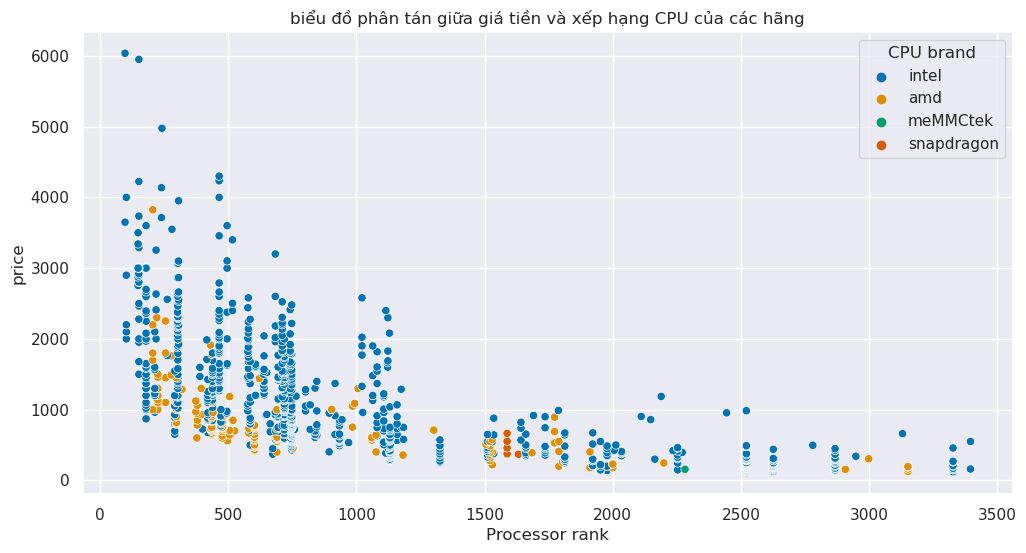

In [24]:
sns.set(rc={"figure.figsize":(12, 6)}) 
sns.scatterplot(data=df, x="Processor rank", y="price", hue="CPU brand", palette='colorblind')
plt.title('biểu đồ phân tán giữa giá tiền và xếp hạng CPU của các hãng')

Dựa trên biểu đồ phân tán giữa giá tiền và xếp hạng CPU (CPU rank càng thấp càng mạnh) của các hãng, ta thấy CPU AMD tuy cung cấp không đa dạng bằng Intel, nhưng hãng này vẫn đuổi kịp về hiệu năng so với Intel, đồng thời, những laptop chạy chip AMD cũng có giá mềm hơn rất nhiều và cho mực hiệu năng ngang ngửa với intel.

Có thể giải thích thị phần AMD không cao bằng Intel, là do hãng hay gặp một số lỗi liên quan đến xung đột phần mềm, cũng như việc AMD đã chìm trên thị trường gần 1 thập kỹ và hãng nãy vừa vực dậy từ năm 2016 nhờ kiến trúc Zen đột phá, cho tốc độ tốt, và giá thành mềm hơn. Có thể nói AMD đang từng bước thu phục thị trường bên cạnh ông lớn Intel

In [ ]:
"""
intel_df=df[df['CPU brand']=='intel']
amd_df=df[df['CPU brand']=='amd']
plt.figure(figsize=(15, 5))
plt.scatter(intel_df['CPU rank'], intel_df['price'], 
    color='pink'
    )
plt.scatter(amd_df['CPU rank'], amd_df['price'], 
    color='red')
plt.legend(['Intel', 'AMD'], loc='upper left')
#biểu đồ liên quan tới rank của cpu do amd sản xuất và intel sản xuất, đến giá tiền
"""

"\nintel_df=df[df['CPU brand']=='intel']\namd_df=df[df['CPU brand']=='amd']\nplt.figure(figsize=(15, 5))\nplt.scatter(intel_df['CPU rank'], intel_df['price'], \n    color='pink'\n    )\nplt.scatter(amd_df['CPU rank'], amd_df['price'], \n    color='red')\nplt.legend(['Intel', 'AMD'], loc='upper left')\n#biểu đồ liên quan tới rank của cpu do amd sản xuất và intel sản xuất, đến giá tiền\n"

Vậy kiểm tra xem giữa trọng lượng laptop và giá tiền có liên quan với nhau không? Liệu laptop càng nhẹ thì giá càng cao

[Text(0.5, 1.0, 'Biểu đồ hộp thể hiện trọng lượng và giá cả laptop')]

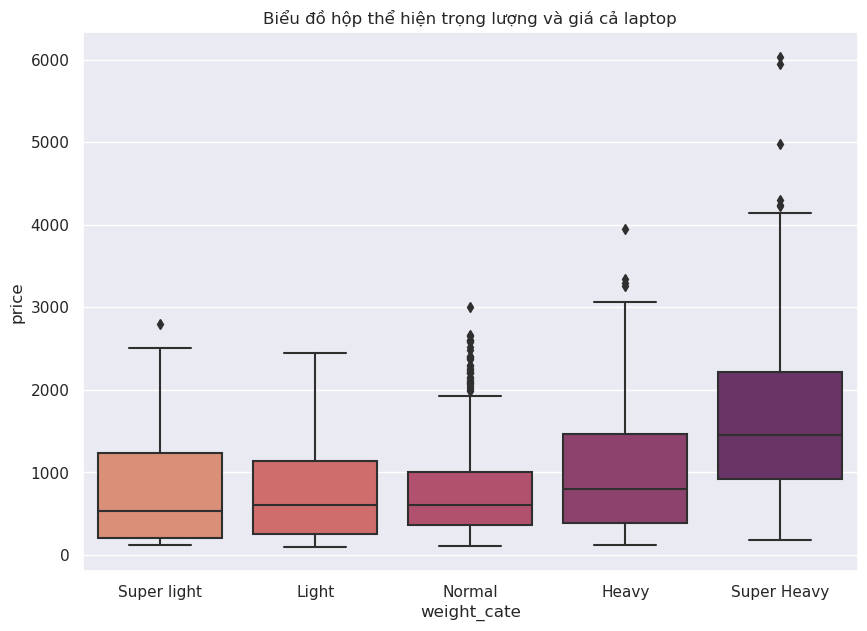

In [25]:
df['weight_cate'] = pd.cut(df['weight'], 
                             bins=(0,1,1.5,2,2.5,10), 
                             labels=['Super light', 'Light', 'Normal', 'Heavy', 'Super Heavy'])

df['price_cate'] = pd.cut(df['price'], 
                             bins=[0, 300, 500, 900, 1500, np.inf], 
                             labels=['< 300$', '< 500$', '< 900$', '< 1500$', 'Luxury'])

fig, ax=plt.subplots(figsize=(10, 7))
sns.boxplot(x = 'weight_cate',
            y = 'price',
            palette='flare',
            data=df).set(title='Biểu đồ hộp thể hiện trọng lượng và giá cả laptop')

Kết quả khá bất ngờ, máy càng nặng thì giá tiền càng cao, điều gì đã dẫn tới điều này?

In [31]:
df['GPU type']=df['Graphics Coprocessor'].apply(lambda x: 'dedicated' if len(re.findall(r'^nvidia.*', x))!=0 else 'integrated')

<AxesSubplot:xlabel='weight_cate', ylabel='count'>

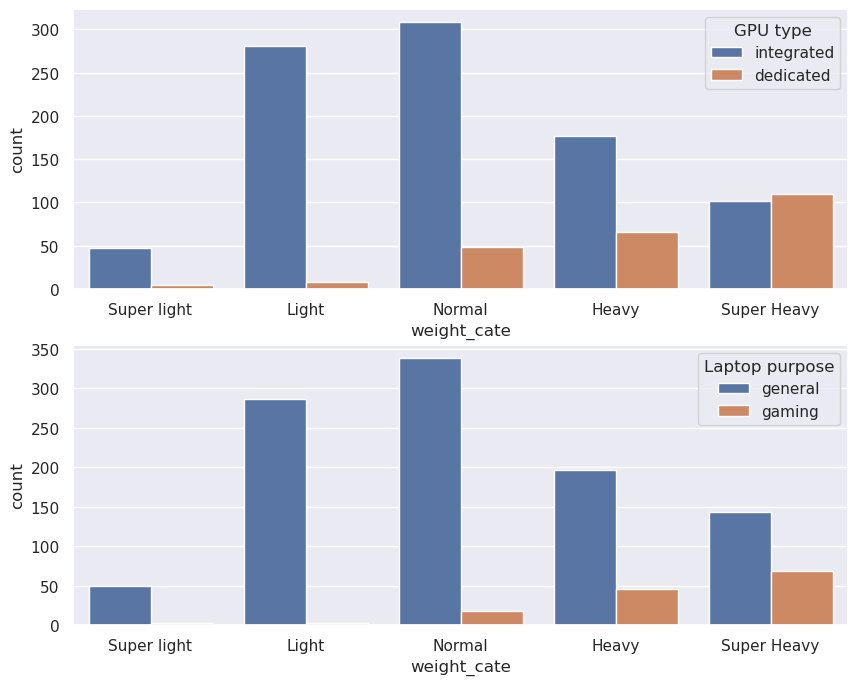

In [32]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
sns.countplot(x="weight_cate",
              data=df,
              hue="GPU type")
plt.subplot(2, 1, 2)
sns.countplot(x="weight_cate",
              data=df,
              hue="Laptop purpose")

Ta có thể thấy, khi trọng lượng càng tăng số lượng máy có card độ hoạ rời càng tăng (máy có card rời cũng sẽ bao gồm card tích hợp) mà điều này cũng dẫn tới số lượng máy gaming cũng tập trung nhiều hơn, nên có thể giải thích được vì sao máy có trọng lượng lớn lại thường giá cao

Text(0.5, 1.0, 'Biểu đồ phân tán giữa giá tiền và tốp bán chạy')

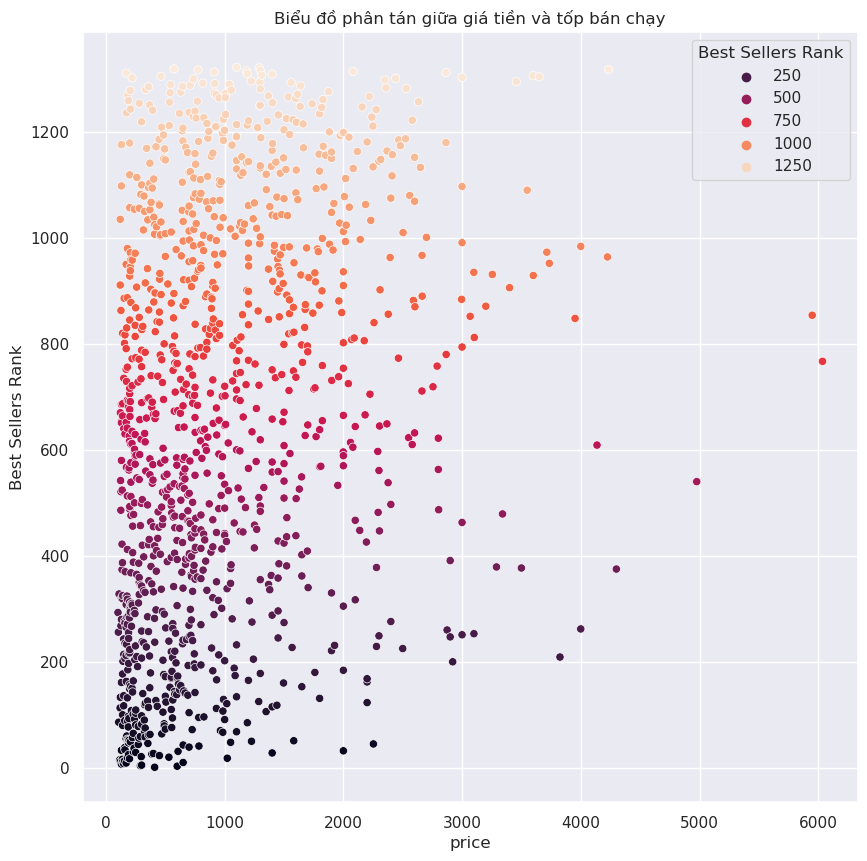

In [33]:
sns.set(rc={"figure.figsize":(10, 10)}) 
sns.scatterplot(data=df, x="price", y="Best Sellers Rank", hue="Best Sellers Rank", palette='rocket')
plt.title('Biểu đồ phân tán giữa giá tiền và tốp bán chạy')

Sau khi kiểm tra yếu tố phần cứng ảnh hưởng tới giá, thử kiểm tra xem yếu tố phần mềm là hệ điều hành có liên quan gì tới giá không

In [35]:
df.columns

Index(['index', 'name', 'Brand', 'Best Sellers Rank', 'weight', 'Laptop type',
       'Laptop purpose', 'Screen Size', 'Hard Drive Size', 'Hard Drive Type',
       'Memory Speed', 'Memory Size', 'Memory Type', 'Processor',
       'Processor rank', 'Graphics Coprocessor', 'Graphics Coprocessor perf',
       'Optical Drive Type', 'Operating System', 'Number of USB 3.0 Ports',
       'Number of USB 2.0 Ports', 'Date First Available', 'Customer Reviews',
       'old_price', 'price', 'CPU brand', 'weight_cate', 'price_cate',
       'GPU type'],
      dtype='object')

<AxesSubplot:xlabel='Operating System', ylabel='Graphics Coprocessor perf'>

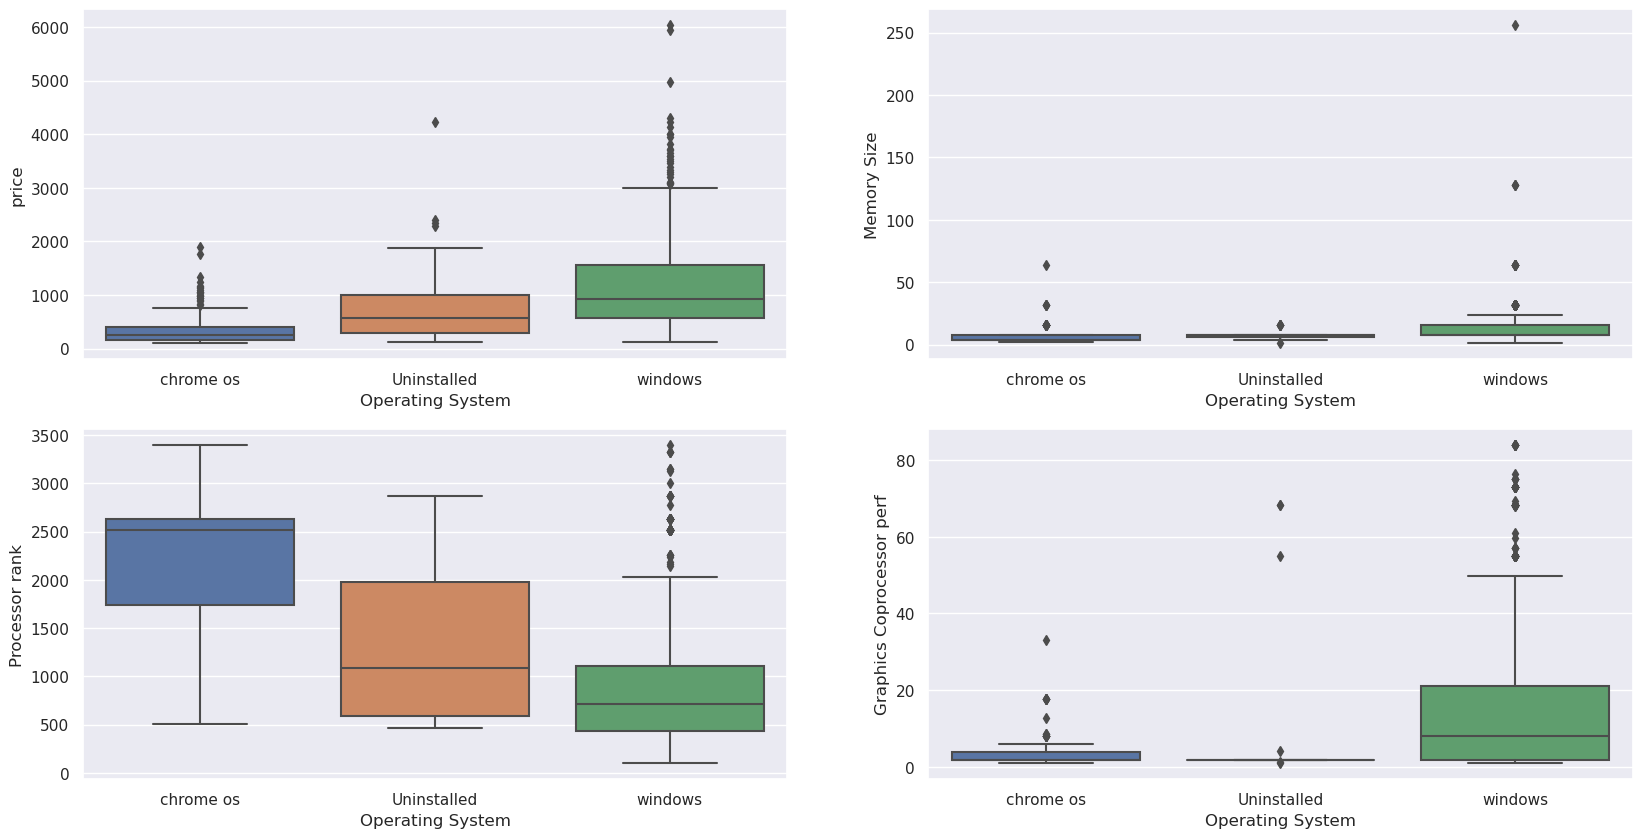

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.boxplot(x=df["Operating System"], y=df['price'])
plt.subplot(2, 2, 2)
sns.boxplot(x=df["Operating System"], y=df['Memory Size'])
plt.subplot(2, 2, 3)
sns.boxplot(x=df["Operating System"], y=df['Processor rank'])
plt.subplot(2, 2, 4)
sns.boxplot(x=df["Operating System"], y=df['Graphics Coprocessor perf'])

Ta thấy những laptop được hệ điều hành chrome os có giá rẻ hơn windows, 
và từ phân tích trên ta thấy hệ điều hành chrome os được cài ở những máy có cấu hình rất thấp
(như trên là dựa vào CPU rank và GPU performance), nên kết luận khác với windows, chrome os là hệ điều hành nhẹ, nên chỉ cài cho những máy
có cấu hình thấp, từ đó máy chạy hệ điều hành này giá thường rẻ